In [68]:
import pandas as pd

path = "mapped_summaries_l3.csv"
neg = "negative_claims.csv"

df = pd.read_csv(path)
df_neg = pd.read_csv(neg)

In [69]:
df["Entailment"] = "entailment"

def get_first_10_summary_sentences(group):
    # Get the first 10 summary sentences
    first_10_sentences = group.head(10)
    return first_10_sentences

# Apply the function to each group and reset the index
df = df.groupby('book_num').apply(get_first_10_summary_sentences).reset_index(drop=True)
df

,model_size,book_num,summary_sentence_num,summary_sentence,text_chunk,Entailment
0,175b,0,0,"Uncle Pros is helping Laurella, his sick niece...","THE BIRTH OF A WOMAN-CHILD\n\n""Whose cradle's ...",entailment
1,175b,0,1,"Laurella explains that her husband, Consadine,...",selfish--said she'd like to know how I was goi...,entailment
2,175b,0,2,Pros takes the cradle outside to get the last ...,"rich, broken light from the cavernous fireplac...",entailment
3,175b,0,3,Mavity sends Bud and Mandy Ann to ask her fath...,"\n""Well, you go ask Pap to look in the green c...",entailment
4,175b,0,4,Pros finishes repairing the cradle and places ...,"she wants--ain't ye, Pretty?""\n\nAnd, having m...",entailment
...,...,...,...,...,...,...
1495,175b,266,5,"The rider asks Mr. Lorry if he's Mr. Lorry, an...","himself. ""He's hoarser than suits me, is Jerry...",entailment
1496,175b,266,6,Mr. Lorry gets into the coach and the passenge...,\nWith those words the passenger opened the co...,entailment
1497,175b,266,7,Every room in every house encloses its own sec...,room in every one of them encloses its own sec...,entailment
1498,175b,266,8,The messenger thinks to himself that it wouldn...,"muffled again.\n\n""No, Jerry, no!"" said the me...",entailment


In [70]:
df_neg["Entailment"] = "contradiction"
df_neg

,model_size,book_num,summary_sentence_num,summary_sentence,text_chunk,Entailment
0,175b,0,2,Pros takes the cradle outside to get the first...,"rich, broken light from the cavernous fireplac...",contradiction
1,175b,0,4,Pros finishes repair the cradle and removes th...,"she wants--ain't ye, Pretty?""\n\nAnd, having m...",contradiction
2,175b,0,5,"Laurella decide to name the baby Johnnie, afte...",hit the name that should 'a' went with the clo...,contradiction
3,175b,0,7,"Johnnie's mother, Laurella, is absent from the...","walk. Her mother would get up too, and that wa...",contradiction
4,175b,0,8,Laurella reluctantly refuses to let Johnnie go...,"and able.""\n\nAnd sighingly--yet light-hearted...",contradiction
...,...,...,...,...,...,...
415,175b,266,1,"In England, there is a lack of order and prote...","rustic mire, snuffed about by pigs, and rooste...",contradiction
416,175b,266,2,A man walks up the Dover road on a Saturday mo...,\nII. The Mail\n\n\nIt was the Dover road that...,contradiction
417,175b,266,4,"Suddenly, the guard hears a horse coming at a ...","\n""I say a horse at a canter coming up, Joe.""\...",contradiction
418,175b,266,8,The messenger assures himself that it would be...,"muffled again.\n\n""No, Jerry, no!"" said the me...",contradiction


In [71]:
merged_df = pd.concat([df, df_neg]).sort_values(by=['book_num', 'summary_sentence_num', 'Entailment']).reset_index(drop=True)
merged_df

,model_size,book_num,summary_sentence_num,summary_sentence,text_chunk,Entailment
0,175b,0,0,"Uncle Pros is helping Laurella, his sick niece...","THE BIRTH OF A WOMAN-CHILD\n\n""Whose cradle's ...",entailment
1,175b,0,1,"Laurella explains that her husband, Consadine,...",selfish--said she'd like to know how I was goi...,entailment
2,175b,0,2,Pros takes the cradle outside to get the first...,"rich, broken light from the cavernous fireplac...",contradiction
3,175b,0,2,Pros takes the cradle outside to get the last ...,"rich, broken light from the cavernous fireplac...",entailment
4,175b,0,3,Mavity sends Bud and Mandy Ann to ask her fath...,"\n""Well, you go ask Pap to look in the green c...",entailment
...,...,...,...,...,...,...
1915,175b,266,7,Every room in every house encloses its own sec...,room in every one of them encloses its own sec...,entailment
1916,175b,266,8,The messenger assures himself that it would be...,"muffled again.\n\n""No, Jerry, no!"" said the me...",contradiction
1917,175b,266,8,The messenger thinks to himself that it wouldn...,"muffled again.\n\n""No, Jerry, no!"" said the me...",entailment
1918,175b,266,9,"The bank is in danger, just as he had last see...","safe, and strong, and sound, and still, just a...",contradiction


In [72]:
merged_df = merged_df.drop_duplicates(subset=['book_num', 'summary_sentence_num'], keep='first')
merged_df

,model_size,book_num,summary_sentence_num,summary_sentence,text_chunk,Entailment
0,175b,0,0,"Uncle Pros is helping Laurella, his sick niece...","THE BIRTH OF A WOMAN-CHILD\n\n""Whose cradle's ...",entailment
1,175b,0,1,"Laurella explains that her husband, Consadine,...",selfish--said she'd like to know how I was goi...,entailment
2,175b,0,2,Pros takes the cradle outside to get the first...,"rich, broken light from the cavernous fireplac...",contradiction
4,175b,0,3,Mavity sends Bud and Mandy Ann to ask her fath...,"\n""Well, you go ask Pap to look in the green c...",entailment
5,175b,0,4,Pros finishes repair the cradle and removes th...,"she wants--ain't ye, Pretty?""\n\nAnd, having m...",contradiction
...,...,...,...,...,...,...
1913,175b,266,5,"The rider asks Mr. Lorry if he's Mr. Lorry, an...","himself. ""He's hoarser than suits me, is Jerry...",entailment
1914,175b,266,6,Mr. Lorry gets into the coach and the passenge...,\nWith those words the passenger opened the co...,entailment
1915,175b,266,7,Every room in every house encloses its own sec...,room in every one of them encloses its own sec...,entailment
1916,175b,266,8,The messenger assures himself that it would be...,"muffled again.\n\n""No, Jerry, no!"" said the me...",contradiction


In [74]:
merged_df.to_csv("evaluation_entailment.csv", index=False)

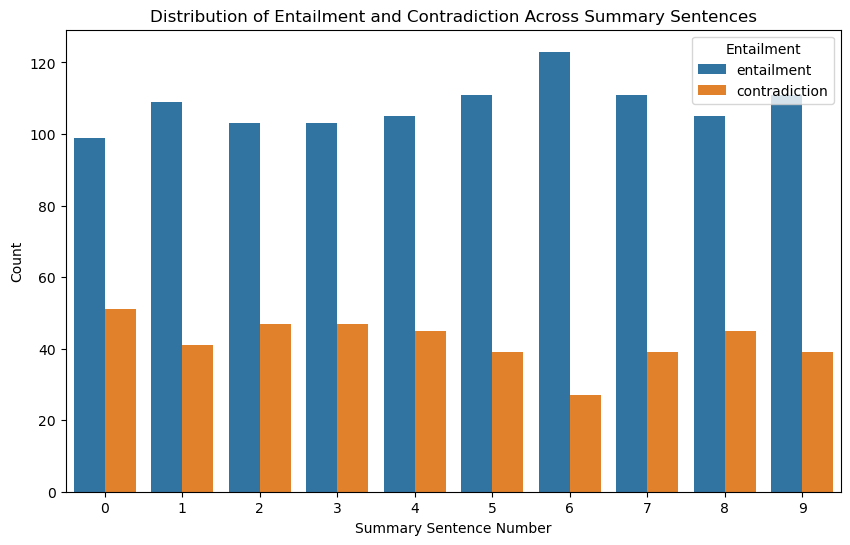

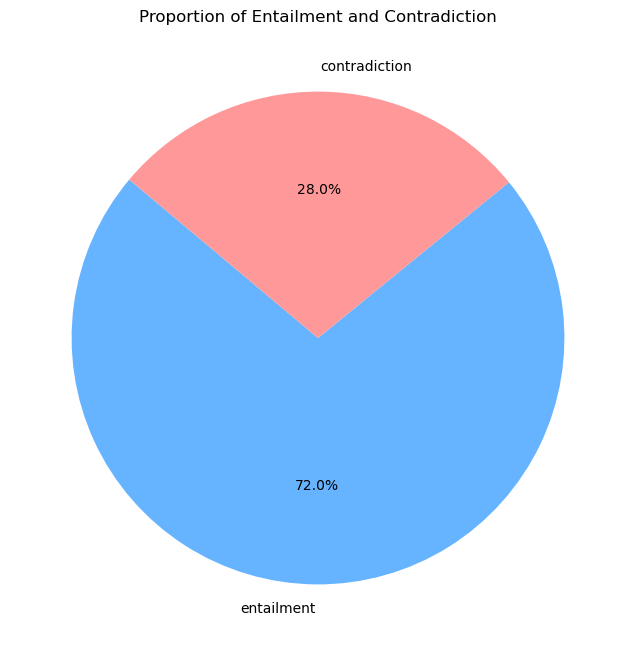

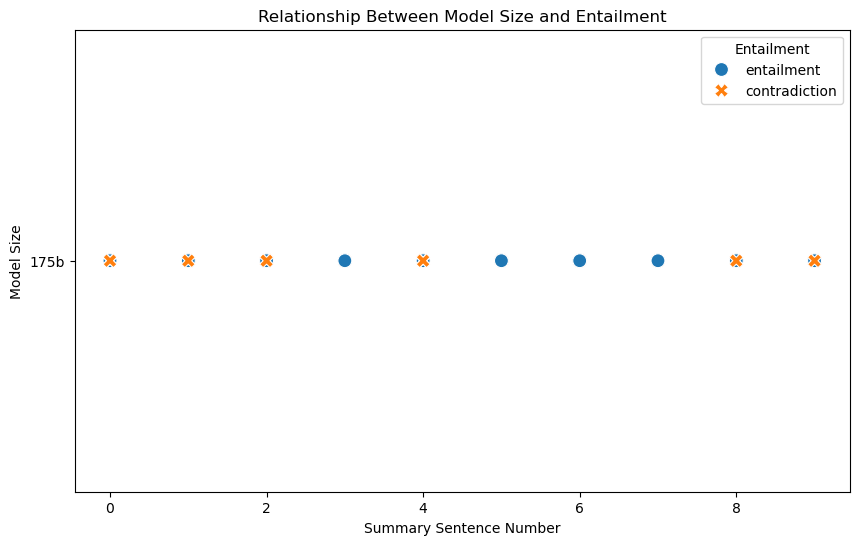

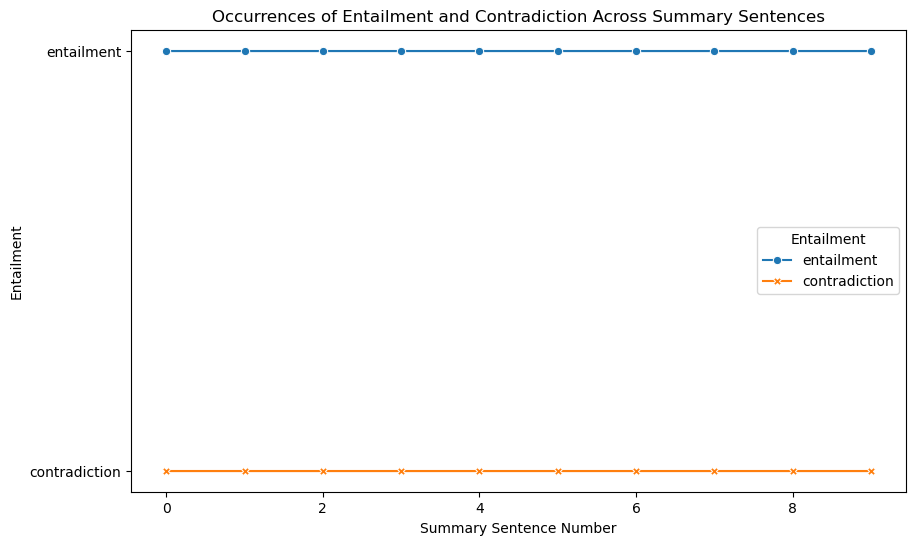

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart: Distribution of entailment and contradiction
plt.figure(figsize=(10, 6))
sns.countplot(x='summary_sentence_num', hue='Entailment', data=merged_df)
plt.title('Distribution of Entailment and Contradiction Across Summary Sentences')
plt.xlabel('Summary Sentence Number')
plt.ylabel('Count')
plt.legend(title='Entailment')
plt.show()

# Pie Chart: Proportion of entailment and contradiction
plt.figure(figsize=(8, 8))
entailment_counts = merged_df['Entailment'].value_counts()
plt.pie(entailment_counts, labels=entailment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Proportion of Entailment and Contradiction')
plt.show()

# Scatter Plot: Relationship between model size and entailment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='summary_sentence_num', y='model_size', hue='Entailment', style='Entailment', s=100, data=merged_df)
plt.title('Relationship Between Model Size and Entailment')
plt.xlabel('Summary Sentence Number')
plt.ylabel('Model Size')
plt.legend(title='Entailment')
plt.show()

# Line Chart: Occurrences of entailment and contradiction across summary sentences
plt.figure(figsize=(10, 6))
sns.lineplot(x='summary_sentence_num', y='Entailment', hue='Entailment', style='Entailment', markers=True, dashes=False, data=merged_df)
plt.title('Occurrences of Entailment and Contradiction Across Summary Sentences')
plt.xlabel('Summary Sentence Number')
plt.ylabel('Entailment')
plt.legend(title='Entailment')
plt.show()